### Data Science for Humanities 2
## Session: Python's Data Science Stack
### Part 1: Numpy & Pandas
#### Summer term 23
##### Prof. Goran Glavaš, Lennart Keller

## `Numpy` & Scientific Programming: Moving from lists to arrays

Data Science heavily relies on Linear Algebra.
While Python is a flexible multi-purpose programming language it isn't necessarily fast in doing numerical operations.

`Numpy` was developed to alleviate this drawback and offers various functions to perform mathematical operations efficiently.

Essentially, it provides you with three things:

* `np.ndarray`: A flexible datatype for storing sequences of numbers in a fixed shape of any form.
* Prebuilt function to manipulate `np.ndarrays`
* An extensive set of mathematical operations directly applicable on `np.ndarrays`


Also, `Numpy` became the foundation of most other data science libraries in Python, rendering it the lingua franca between different libraries or even inspiring other libraries like `PyTorch` to borrow many of its concepts.





## First things first - Numpy: Usage basics

__Installation__

Numpy is a third-party library and is not included in a standard Python installation.

To install it open a terminal, and type `pip install numpy` or `conda install numpy` depending on your Python setup

__Import__

By convention, the whole `numpy` is imported with the abbreviation `np`.

```python
import numpy as np
```

## Creating `ndarrays`

There are many ways to create `arrays`.

Here is a quick overview over the most common ones:

* Creating from existing (nested) lists

In [2]:
import numpy as np
my_list = [[1, 2], [3, 4]]
my_array = np.array(my_list)
print(my_array)

[[1 2]
 [3 4]]


* Creating arrays with fixed content 

In [3]:
zero_array = np.zeros(shape=(2, 2))
print(zero_array)

ones_array = np.ones((2, 2))
print(ones_array)

constant_array = np.full(shape=(2, 2), fill_value=-100) #fill_value: ersetzt werte mit einem eingegebenen wert
print(constant_array)

[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]
[[-100 -100]
 [-100 -100]]


In [4]:
np.zeros(shape=(3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

* Creating arrays with consecutive content

In [5]:
numbers = np.arange(9)
numbers

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [6]:
rand_normal_array = np.random.randn(10000)
print(rand_normal_array.shape)
print("Mean:", rand_normal_array.mean(), "Std:", rand_normal_array.std())

rand_integer_array = np.random.randint(0, 2, (10))
print(rand_integer_array)

(10000,)
Mean: 0.02357743533648565 Std: 0.9888130306793813
[0 0 1 1 1 0 0 0 1 1]


## `ndarray`: Dimensionality

Creating a `ndarray` from a nested list, gives you a multidimensional arrays.
In theory, `ndarrays` can have as many dimensions as you like.

Since arrays have a fixed size, each dimension also has a fixed length.

The number of dimension and the size of each dimension determine the shape of an array.

There are might be special naming conventions depending on the shape of your arrays:

* 1-dim => Vector
* 2-dim => Matrix

_Note:_ Obviously in a mathematical sense, these terms have more implications but we ignore those for now.

## `ndarray`: Indexing

Like lists, you can also use indexing or slicing to address unary values or certain patches of your data.

The syntax mostly follows Python`s conventions but is extended to directly address specific dimensions.

In [7]:
array = np.arange(27).reshape(3, 3, 3)
print(array.ndim)
print(array.shape)
print(array)

3
(3, 3, 3)
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


In [8]:
# Get the first element across all dimensions
print(array[0, 0, 0]) #array 0, zeile 0, spalte 0

# Get the first "matrix"
print(array[0, :, :])

# Get the last row vector of the second matrix
print(array[1, -1, :])

0
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[15 16 17]


To index or slice with `ndarrays` you can specify values for each dimension independently.

It's also possible to combine slicing and indexing at specific dimensions.

Values for dimension are written into one single slicing expression, value are separated by commas.

```python
array[<dim0>, <dim1>, <dim1>, ...]
```

## `ndarray`: Masking

Masking allows you to select all values in an array which fulfill a condition.

Let's generate some data mimicking the number of hourly visits for a webpage over a year.

In [18]:
site_traffic = np.random.randint(100, 1000, (365, 24))
site_traffic.shape, site_traffic.mean()

((365, 24), 550.0025114155251)

Suppose we would like to count the hours with high traffic (> 750 visits).

The Pythonic way to do this would be to treat the array as a nested list and iterate over all the dimensions using for-loops:

In [25]:
high_traffic_hours = 0
for day_idx in range(site_traffic.shape[0]): #shape: max day value of the vector (365)
    for hour_idx in range(site_traffic.shape[1]): #shape: max hour value of the vector (24)
        traffic = site_traffic[day_idx, hour_idx]
        if traffic > 750:
            high_traffic_hours += 1
high_traffic_hours

2425

But there is a better way to do this, using `numpy` masking functionality.

Masking is a technique to create a boolean mask that has the same shape as the original array. 

The mask identifies values in the array that meet a specified condition, marking them as True while marking other values as False.

In [26]:
high_traffic_periods = site_traffic > 750
high_traffic_periods

array([[False,  True,  True, ...,  True, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False,  True, False],
       ...,
       [False,  True, False, ...,  True, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False]])

Because boolean values translate to 0, 1, we can easily sum them up, to get the number of high-traffic hours.

In [10]:
high_traffic_periods.sum() #sum of our high_traffic_periods array from above

2467

We can also use masks, to perform:
1. Retrieving Values
2. Inplace operations

#### Retrieving

In [27]:
high_traffic_values = site_traffic[high_traffic_periods] #selects the indices (>750) of our site_traffic
print(high_traffic_values)
print(high_traffic_values.shape)

[982 821 945 ... 989 967 999]
(2425,)


#### Inplace Manipulations

In [31]:
low_median_traffic = site_traffic.copy() #copy(): returns a copy of site_traffic
low_median_traffic[high_traffic_periods] = 0.0 #values below our median value are (here) 0
low_median_traffic

array([[  707, 10000, 10000, ..., 10000,   306,   392],
       [10000,   558,   268, ...,   505,   514,   721],
       [10000,   292,   681, ...,   279, 10000,   416],
       ...,
       [  106, 10000,   567, ..., 10000,   413,   151],
       [  683,   208,   201, ...,   340,   211, 10000],
       [  274,   196,   375, ...,   399, 10000,   646]])

## `ndarray`: Reshaping

It's possible to change the shape of an existing array.

This operation is called reshaping. Reshaping works by specifying the new number and sizes of dimensions.

To make reshaping work the number of entries in the newly created array has to match the number of entries in the existing array.

In [35]:
vector = np.array([1, 2, 3, 4, 5, 6, 7, 8])
print(vector)
print("Orig shape:", vector.shape)
print("No. of entries:", vector.size)

matrix = vector.reshape(2, 4)
print(matrix)
print("New shape:", matrix.shape)
print("No. of entries:", matrix.size)

tuples = vector.reshape(-1, 2) #-1 macht erstellt automatisch die anzahl an benötigten max. zeilen (wir wollen ja sicher 2 spalten)
print(tuples)
print("New shape:", tuples.shape)
print("No. of entries:", tuples.size)


[1 2 3 4 5 6 7 8]
Orig shape: (8,)
No. of entries: 8
[[1 2 3 4]
 [5 6 7 8]]
New shape: (2, 4)
No. of entries: 8
[[1 2]
 [3 4]
 [5 6]
 [7 8]]
New shape: (4, 2)
No. of entries: 8


The `.reshape`-method takes in as many arguments as desired dimensions, and each argument specifies the number of entries in that dimension.

It's possible to leave the size of one dimension and just write `-1`, `numpy` will infer the size automatically.

## `ndarray`: Computations

`Numpy` offers a wide variety of functions that are optimized to work efficiently on `ndarrays`.

These functions take in either a single array or two of them and return an output-array.


In [36]:
# Average hourly visits
site_traffic.mean(), np.mean(site_traffic)

(550.0025114155251, 550.0025114155251)

As you can see above, unary-functions can often (but not always) directly be accessed as a property of the `ndarray`. 


Some of these function can also be applied along a specific dimension:

In [38]:
# Average number of visits per day
site_traffic.mean(axis=1).shape #axis: 1=column, 0=row

(365,)

Binary functions work like the math operators you all know:

In [39]:
a, b  = np.arange(3), np.arange(3) * 2
a, b

(array([0, 1, 2]), array([0, 2, 4]))

In [40]:
# Element wise addition: addition of 2 matrices
c = a + b
c

array([0, 3, 6])

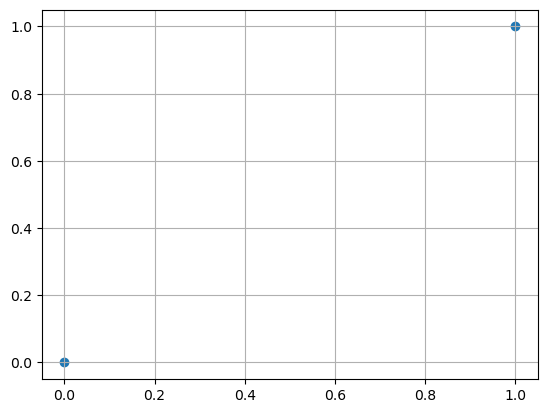

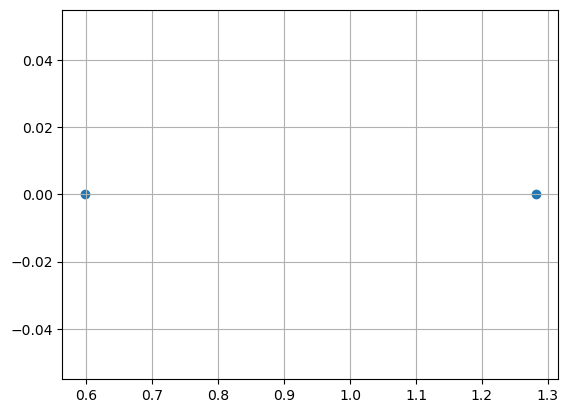

In [41]:
import matplotlib.pyplot as plt



# Define the angle of rotation in radians
theta = np.pi/9
# Create a 2D rotation matrix
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])

points = np.array([
    [1, 1],
    [0, 0]
])

plt.scatter(x=points[:, 0], y=points[:, 1])
plt.grid(True)
plt.show()

# Matrix multiplication to rotate points in space
points_rotated = rotation_matrix @ points.T
# Equivalent to:
# points_rotated = np.matmul(rotation_matrix, np.transpose(points))


plt.scatter(x=points_rotated[:, 0], y=points_rotated[:, 1])
plt.grid(True)
plt.show()

## `ndarray`: Broadcasting

As we've seen now `numpy` is fast in processing `ndarrays` of the same shape.

This does not only apply to vectors or matrices but also to arrays of arbitrary dimensionality

But, it is also possible to perform arithmetic operations, with `ndarrays` and scalar values.

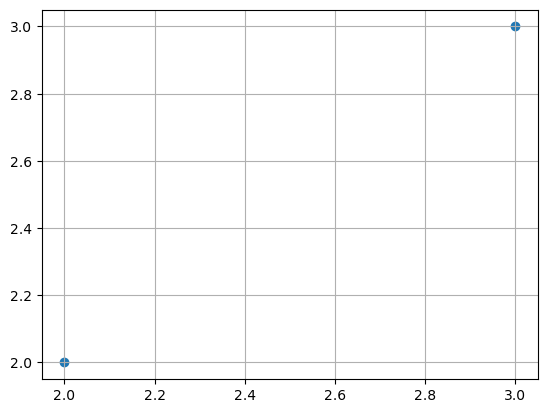

In [47]:
point_shifted = points + 2
plt.scatter(x=point_shifted[:, 0], y=point_shifted[:, 1])
plt.grid(True)
plt.show()

It is also possible to compute with arrays of different shapes under some circumstances:

In [48]:
matrix = np.arange(9).reshape(3, 3) #numbers til 9 with a matrix of the size [3, 3]
print(matrix)

row_vec = np.array([1, -1, 5]) #simple vector
print(row_vec)
print("matrix + row_vec=\n", matrix + row_vec)

col_vec = np.array([[1], [-1], [5]]) #column vector because of the double square brackets [[]]
print(col_vec.shape)
print(col_vec)
print("matrix + col_vec=\n", matrix + col_vec)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[ 1 -1  5]
matrix + row_vec=
 [[ 1  0  7]
 [ 4  3 10]
 [ 7  6 13]]
(3, 1)
[[ 1]
 [-1]
 [ 5]]
matrix + col_vec=
 [[ 1  2  3]
 [ 2  3  4]
 [11 12 13]]


To perform those operations on `ndarrays` with mixed dimensionality, `numpy` uses broadcasting to automatically adjust the dimensions of the array with fewer dimensions, by padding it to the right size.


<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">
<p style="font-size: 6pt;">Source: https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html<p>

To successfully perform broadcasting some constraints on the shape and size of the arrays have to be fulfilled:

```python
for dim_a, dim_b in zip(a.shape[::-1], b.shape[::-1]):
    if not (1 in (dim_a, dim_b) or dim_a == dim_b):
        raise ValueError("operands could not be broadcast together")
```

If arrays do not have the same number of dimensions the array with fewer dimensions is expanded by adding dimensions to the left.
    
(`np.([1]).unsqueeze(0) => np.ndarray([[1]])`)

## `Pandas`: Wrangling with data in Python

While `Numpy` is designed to work with data in arbitrary shapes, Pandas is optimized to work with tabular data.

### `DataFrame`

Like `Numpy's` `ndarray`, there is one essential container class which builds the core of the library, the `DataFrame`.

Conceptually, you can think of a `DataFrame` as the Python version of a Spreadsheet.

Consider, the sales table from above:

| **Transaction_ID: int** | **Product: str** | **Price: float** | **Quantity: int** |
|:-----------------------:|:----------------:|:----------------:|:-----------------:|
|            0            |       Beer       |       0.89       |         6         |
|            0            |       Chips      |       1.99       |         1         |
|            1            |       Milk       |       1.20       |         3         |
|            2            |       Bread      |       2.55       |         1         |
|           ...           |        ...       |        ...       |        ...        |

It can directly be represented as a `DataFrame`:

In [50]:
import pandas as pd

columns = ["Transaction", "Product", "Price", "Quantity"] #sets the column names of out dataframe

#our data in rows
data = [    
    [0, "Beer", 0.89, 6],
    [0, "Chips", 1.99, 1],
    [1, "Milk", 1.20, 3],
    [2, "Bread", 2.55, 1],
]

df = pd.DataFrame(data=data, columns=columns)
df

,Transaction,Product,Price,Quantity
0,0,Beer,0.89,6
1,0,Chips,1.99,1
2,1,Milk,1.20,3
3,2,Bread,2.55,1


DataFrame consists of columns and rows.

Typically each column represents a feature, or field of your data.
And each row represents a represents a record/ instance of your dataset.

In [51]:
df.shape, df.columns, df.index

((4, 4),
 Index(['Transaction', 'Product', 'Price', 'Quantity'], dtype='object'),
 RangeIndex(start=0, stop=4, step=1))

Pandas offers a wide variety of different way to access your data:

In [52]:
# Access columns
df["Price"]

0    0.89
1    1.99
2    1.20
3    2.55
Name: Price, dtype: float64

In [56]:
# Access rows
df.loc[0]

Transaction       0
Product        Beer
Price          0.89
Quantity          6
Name: 0, dtype: object

Also there is a wide variety of additional functions to manipulate your data, or create new aggregated views on it:

In [25]:
# Sorting based on specific columns
df.sort_values(by="Price", ascending=False)

,Transaction,Product,Price,Quantity
3,2,Bread,2.55,1
1,0,Chips,1.99,1
2,1,Milk,1.20,3
0,0,Beer,0.89,6


In [58]:
# Aggregating all rows with a specific value
df.groupby("Transaction")["Price"].sum() #sorts by transaction number

Transaction
0    2.88
1    1.20
2    2.55
Name: Price, dtype: float64

In [27]:
df.groupby("Product")["Quantity"].mean() #sorts alphabetically by product

Product
Beer     6.0
Bread    1.0
Chips    1.0
Milk     3.0
Name: Quantity, dtype: float64

In [59]:
# Counting unique values within columns
df.Transaction.value_counts()

Transaction
0    2
1    1
2    1
Name: count, dtype: int64

In [60]:
# Querying for data:
df.query("Price < 2.0") #query all where price is below 2.0
# Equivalent to
# df[df["Price"] < 2.0]

,Transaction,Product,Price,Quantity
0,0,Beer,0.89,6
1,0,Chips,1.99,1
2,1,Milk,1.20,3


In [30]:
df.query("Product.str.startswith('B')") #print everything that starts with the letter B

# Equivalent to 
# df[df["Product"].str.startswith("B")]

,Transaction,Product,Price,Quantity
0,0,Beer,0.89,6
3,2,Bread,2.55,1


In [63]:
def is_even(x):
    return x % 2 == 0

df.query("@is_even(Transaction)") #shows everything with a 0 rest in transaction

# Equivalent to 
# df[[is_even(t) for t in df["Transaction"]]]

,Transaction,Product,Price,Quantity
0,0,Beer,0.89,6
1,0,Chips,1.99,1
3,2,Bread,2.55,1


In [64]:
# Saving data in a variety of commonly used formats
df.to_csv("sales.csv", index=False)
df.to_excel("sales.xlsx", index=False)

In [65]:
# Loading data in various formats
df = pd.read_excel("sales.xlsx")
df

,Transaction,Product,Price,Quantity
0,0,Beer,0.89,6
1,0,Chips,1.99,1
2,1,Milk,1.20,3
3,2,Bread,2.55,1


And so much more!

### How to learn __really__ `Pandas`?

TL;DR Just use it!

Learning `Pandas` - even more like `Numpy` - is best done, while you work on your specific projects.

Going through all its features in the course would be too extensive. 
So we'll introduce additional features as we go on.

You are strongly encouraged to stay curious and always keep on googling (or ask ChatGPT) "How to do xy in Pandas?" 😊


But there are some great resources to start digging deeper:

* [Pandas Docs](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)
* [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
* [Chapter on Pandas in the Data Science Handbook](https://learning.oreilly.com/library/view/python-data-science/9781098121211/part03.html#idm45544948213712)